In [1]:
#!/usr/bin/env python
# Import packages 
import sys
import argparse as arg
# import modules in other directories
# sys.path.append('/glade/work/juliob/PyRegridding/Regridder/')
# sys.path.append('/glade/work/juliob/PyRegridding/Utils/')
sys.path.append('../Regridder/')
sys.path.append('../Utils/')


import importlib
import glob
import copy
#import time
import os 
import subprocess as sp

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    import ESMF as E
except ImportError:
    import esmpy as E

import scripGen as SG
import esmfRegrid as erg


import GridUtils as GrU
import MakePressures as MkP
import humiditycalcs as hum
import MyConstants as Con

# Reload local packages that are under
# development
importlib.reload( erg )



 MyConstants in /glade/work/juliob/PyRegridding/Utils 


<module 'esmfRegrid' from '/glade/work/juliob/PyRegridding/Drivers/../Regridder/esmfRegrid.py'>

In [2]:

Src,Dst='ne30pg3','fv1x1'
Src,Dst='ne240pg3','latlonOxO'


In [3]:
%%time

Regrd1, srcField1, dstField1  = erg.GenWrtRdWeights( Dst=Dst , Src=Src , UseFiles=True )

/glade/work/juliob/GridFiles/Weights/ne240pg3_x_latlonOxO_CONSERVE_2ND.nc
Generating regridding weights. Method CONSERVE_2ND : ESMF method= 5
CPU times: user 7min 19s, sys: 43.8 s, total: 8min 3s
Wall time: 29min 2s


In [4]:
%%time

Regrd2, srcField2, dstField2  = erg.GenWrtRdWeights( Dst=Dst , Src=Src , UseFiles=True )

/glade/work/juliob/GridFiles/Weights/ne240pg3_x_latlonOxO_CONSERVE_2ND.nc
Reading weights from /glade/work/juliob/GridFiles/Weights/ne240pg3_x_latlonOxO_CONSERVE_2ND.nc 
CPU times: user 3min 34s, sys: 7.84 s, total: 3min 41s
Wall time: 4min 45s


In [5]:
%%time

Regrd0, srcField0, dstField0  = erg.GenWrtRdWeights( Dst=Dst , Src=Src , UseFiles=False )

Not dealing with weight files at all - just calculating Regrid object
CPU times: user 6min 38s, sys: 29.7 s, total: 7min 7s
Wall time: 9min 21s


In [ ]:
file = '/glade/derecho/scratch/juliob/archive/c64_gwR2_ne30pg3_FMTHIST_topfix_oldCTL_qbotune_x03/atm/hist/c64_gwR2_ne30pg3_FMTHIST_topfix_oldCTL_qbotune_x03.cam.h0i.1985-01.nc'
X=xr.open_dataset( file )

In [10]:

file = '/glade/derecho/scratch/juliob/archive/c153_topfix_ne240pg3_FMTHIST_QxQsst_xic_x02/atm/hist/c153_topfix_ne240pg3_FMTHIST_QxQsst_xic_x02.cam.h0i.2004-06.nc'
file = '/glade/work/juliob/GridFiles/Topo/ne240pg3_gmted2010_modis_bedmachine_nc3000_Laplace0012_noleak_20240329.nc'
X=xr.open_dataset( file )

In [11]:
phi=X.PHIS.values

In [12]:

srcField0.data[:] = phi[:]
srcField1.data[:] = phi[:]


In [13]:

poop0  = Regrd0(  srcField0 ,  dstField0 )

poop1  = Regrd1(  srcField1 ,  dstField1 )

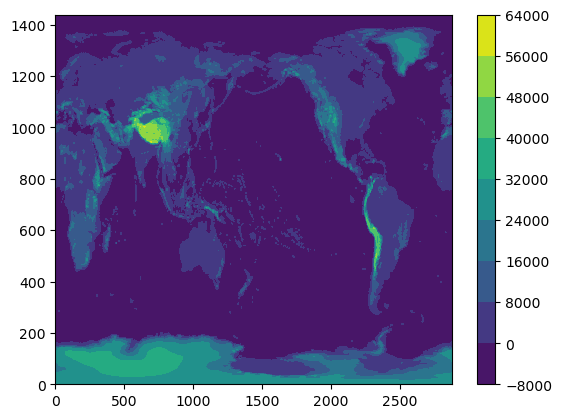

In [14]:
plt.contourf( dstField0.data.T )
plt.colorbar()

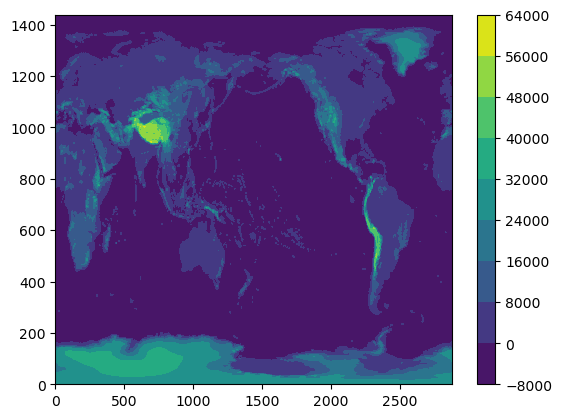

In [15]:
plt.contourf( dstField1.data.T )
plt.colorbar()

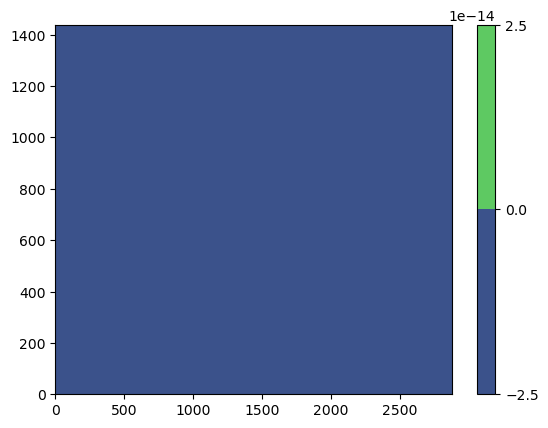

In [16]:
plt.contourf( dstField1.data.T - dstField0.data.T )
plt.colorbar()